In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Opening data

In [6]:
data = pd.read_csv("epl-games_p.csv")

In [7]:
print(data.head())

  div  season        date      team_home  team_away  points_home  points_away  \
0  E0    2008  2008-08-16        Everton  Blackburn          0.0          3.0   
1  E0    2008  2008-08-16           Hull     Fulham          3.0          0.0   
2  E0    2008  2008-08-16     Sunderland  Liverpool          0.0          3.0   
3  E0    2008  2008-08-16         Bolton      Stoke          3.0          0.0   
4  E0    2008  2008-08-16  Middlesbrough  Tottenham          3.0          0.0   

   goals_home  goals_away  hometeam_uid  awayteam_uid  
0         2.0         3.0            13             4  
1         2.0         1.0            16            14  
2         0.0         1.0            29            18  
3         3.0         1.0             6            28  
4         2.0         1.0            21            31  


In [122]:
print(data)

     div  season       date      team_home     team_away  points_home  \
0     E0    2008 2008-08-16        Everton     Blackburn          0.0   
1     E0    2008 2008-08-16           Hull        Fulham          3.0   
2     E0    2008 2008-08-16     Sunderland     Liverpool          0.0   
3     E0    2008 2008-08-16         Bolton         Stoke          3.0   
4     E0    2008 2008-08-16  Middlesbrough     Tottenham          3.0   
...   ..     ...        ...            ...           ...          ...   
4175  E0    2018 2019-05-12    Southampton  Huddersfield          1.0   
4176  E0    2018 2019-05-12       Brighton      Man City          0.0   
4177  E0    2018 2019-05-12         Fulham     Newcastle          0.0   
4178  E0    2018 2019-05-12        Watford      West Ham          0.0   
4179  E0    2018 2019-05-12      Liverpool        Wolves          3.0   

      points_away  goals_home  goals_away  month  day  goal_diff  
0             3.0         2.0         3.0      8   16   

## Data Exploration and Modification

In [8]:
print(data.dtypes)

div              object
season            int64
date             object
team_home        object
team_away        object
points_home     float64
points_away     float64
goals_home      float64
goals_away      float64
hometeam_uid      int64
awayteam_uid      int64
dtype: object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180 entries, 0 to 4179
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   div           4180 non-null   object 
 1   season        4180 non-null   int64  
 2   date          4180 non-null   object 
 3   team_home     4180 non-null   object 
 4   team_away     4180 non-null   object 
 5   points_home   4180 non-null   float64
 6   points_away   4180 non-null   float64
 7   goals_home    4180 non-null   float64
 8   goals_away    4180 non-null   float64
 9   hometeam_uid  4180 non-null   int64  
 10  awayteam_uid  4180 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 359.3+ KB


In [3]:
from skimpy import skim

In [10]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4180   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 11     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ season            │    0 │      0 │    2013 │   3.163 │   2008 │   2010 │   2013 │  2016 │  2018 │ ▇▇▃▇▇▇  │  │
│ │ points_home       │    0 │      0 │   1.634 │   1.318 │      0 │      0 │      1 │     3 │     3 │ ▅ ▅  ▇  │  │
│ │ points_away       │    0 │      0 │   1.118 │   1.268 │      0 │      0 │      1 │     3 │     3 │ ▇ ▅  ▅  │  │
│ │ goals_home        │    0 │      0 │   1.555 │   1.314 │      0 │      1 │      1 │     2 │     9 │   ▇▃▃   │  │
│ │ goals_away        │    0 │      0 │   1.171 │   1.159 │      0 │      0 │      1 │     2 │     7 │   ▇▂▁   │  │
│ │ hometeam_uid      │    0 │      0 │    19.5 │    10.3 │      1 │     12 │     19 │    29 │    36 │ ▆▆▇▇▇▇  │  │
│ │ awayteam_uid      │    0 │      0 │    19.5 │    10.3 │      1 │     12 │     19 │    29 │    36 │ ▆▆▇▇▇▇  │  │
│ └───────────────────┴──────┴────────┴─────────┴─────────┴────────┴────────┴────────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ div                       │       0 │          0 │                            1 │                     4180 │  │
│ │ date                      │       0 │          0 │                            1 │                     4180 │  │
│ │ team_home                 │       0 │          0 │                          1.2 │                     5225 │  │
│ │ team_away                 │       0 │          0 │                          1.2 │                     5225 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [25]:
data_sel = data[data['team_home'].isin(['Everton'])]

data_sel.groupby(["season"]).agg(
    mean_points_home=("points_home", "mean"), median_points_home=("points_home", "median")
)

,mean_points_home,median_points_home
season,,
2008,1.578947,1.0
2009,2.052632,3.0
2010,1.789474,1.0
2011,1.736842,3.0
2012,2.210526,3.0
2013,2.210526,3.0
2014,1.473684,1.0
2015,1.210526,1.0
2016,2.263158,3.0


In [7]:
data['month'] = data["date"].str.split("-").str[1]

In [9]:
data['month'] = pd.to_numeric(data['month'], errors='coerce')

In [10]:
data['day'] = data["date"].str.split("-").str[2]

In [11]:
data['day'] = pd.to_numeric(data['day'], errors='coerce')

In [14]:
data['date'] = pd.to_datetime(data['date'])

In [18]:
data = data.drop(columns=['hometeam_uid', 'awayteam_uid'])

In [20]:
data['goal_diff'] = pd.to_numeric(data['goals_home'] - data['goals_away'])

In [25]:
a = data.groupby(['team_home', 'season'])['points_home'].sum()
a

team_home  season
Arsenal    2008      38.0
           2009      47.0
           2010      37.0
           2011      40.0
           2012      38.0
                     ... 
Wigan      2012      18.0
Wolves     2009      21.0
           2010      28.0
           2011      12.0
           2018      34.0
Name: points_home, Length: 220, dtype: float64

In [28]:
a_2008 = a.loc[(slice(None), [2008])]
a_2008

team_home      season
Arsenal        2008      38.0
Aston Villa    2008      30.0
Blackburn      2008      25.0
Bolton         2008      26.0
Chelsea        2008      39.0
Everton        2008      30.0
Fulham         2008      36.0
Hull           2008      14.0
Liverpool      2008      43.0
Man City       2008      39.0
Man United     2008      50.0
Middlesbrough  2008      24.0
Newcastle      2008      22.0
Portsmouth     2008      27.0
Stoke          2008      35.0
Sunderland     2008      21.0
Tottenham      2008      35.0
West Brom      2008      24.0
West Ham       2008      29.0
Wigan          2008      29.0
Name: points_home, dtype: float64

In [29]:
total_number_of_teams = data['team_home'].nunique()
total_number_of_teams

36

In [ ]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(a_2008)

In [177]:
data.loc[[0, 1]]

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away,month,day,goal_diff
0,E0,2008,2008-08-16,Everton,Blackburn,0.0,3.0,2.0,3.0,8,16,-1.0
1,E0,2008,2008-08-16,Hull,Fulham,3.0,0.0,2.0,1.0,8,16,1.0


In [31]:
data.shape

(4180, 12)

## Data, lists and dictionaries

In [110]:
list_of_teams = data["team_home"].unique().tolist()
list_of_teams[0:1]

['Everton']

In [38]:
teams_with_a = [n for n in list_of_teams if 'A' in n or 'b' in n]
teams_with_a

['Middlesbrough', 'Arsenal', 'Aston Villa', 'Blackburn']

In [165]:
selected_years = [2008]
period = data[data['season'].isin(selected_years)]
period

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away,month,day,goal_diff
0,E0,2008,2008-08-16,Everton,Blackburn,0.0,3.0,2.0,3.0,8,16,-1.0
1,E0,2008,2008-08-16,Hull,Fulham,3.0,0.0,2.0,1.0,8,16,1.0
2,E0,2008,2008-08-16,Sunderland,Liverpool,0.0,3.0,0.0,1.0,8,16,-1.0
3,E0,2008,2008-08-16,Bolton,Stoke,3.0,0.0,3.0,1.0,8,16,2.0
4,E0,2008,2008-08-16,Middlesbrough,Tottenham,3.0,0.0,2.0,1.0,8,16,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,2008,2009-05-24,Aston Villa,Newcastle,3.0,0.0,1.0,0.0,5,24,1.0
376,E0,2008,2009-05-24,Wigan,Portsmouth,3.0,0.0,1.0,0.0,5,24,1.0
377,E0,2008,2009-05-24,Arsenal,Stoke,3.0,0.0,4.0,1.0,5,24,3.0
378,E0,2008,2009-05-24,Liverpool,Tottenham,3.0,0.0,3.0,1.0,5,24,2.0


In [170]:
indices = []

#Data limitation by years and months
selected_years = list(range(2008, 2019)) 
selected_month = list(range(1, 13))
data3 = data[data['season'].isin(selected_years) & data['month'].isin(selected_month)]

#Choosing desired metrics
var = data3.columns.tolist()[5:9]

#Output in separated Dataframe
for i in var:
    team_points_dictionary = {
        n: data3.loc[(data3['team_home'] == n), i].sum() 
        for n in list_of_teams
    }
    indices.append({'': i, **team_points_dictionary})

df_math = pd.DataFrame(indices).T

df_math.columns = df_math.iloc[0]  
df_math = df_math[1:] 

df_math

,points_home,points_away,goals_home,goals_away
Everton,382.0,190.0,358.0,225.0
Hull,111.0,150.0,107.0,145.0
Sunderland,208.0,253.0,200.0,215.0
Bolton,101.0,107.0,104.0,115.0
Middlesbrough,42.0,57.0,34.0,43.0
Arsenal,462.0,123.0,441.0,174.0
West Ham,280.0,244.0,270.0,258.0
Aston Villa,185.0,221.0,179.0,198.0
Man United,481.0,112.0,435.0,166.0
Chelsea,467.0,116.0,457.0,174.0


In [176]:
import random
number = 3
if number > total_number_of_teams:
    print('There are less teams in championship')
else:
    keys1 = random.sample(list(team_points_dictionary.keys()), number)
    print(keys1)

['QPR', 'Arsenal', 'Huddersfield']


In [175]:
df_math.loc[keys1]

,points_home,points_away,goals_home,goals_away
Man United,481.0,112.0,435.0,166.0


In [163]:
random_teams = {a: team_points_dictionary[a] for a in keys}
print(random_teams)

{'Man City': np.float64(168.0), 'Sunderland': np.float64(215.0), 'Birmingham': np.float64(35.0)}


In [164]:
df_new = pd.DataFrame.from_dict(random_teams, orient = 'index', columns=['Points'])
df_new.reset_index(inplace = True)
df_new.rename(columns={'index': 'Team'}, inplace = True)
df_new

,Team,Points
0,Man City,168.0
1,Sunderland,215.0
2,Birmingham,35.0


In [53]:
#Let's convert this dictionary into two separated lists
list1 = list(random_teams.values())
list1

[np.float64(438.0), np.float64(467.0), np.float64(201.0)]

In [54]:
list1 = [float(i) for i in list1]
print(list1)

[438.0, 467.0, 201.0]


In [55]:
list2 = list(random_teams.keys())
list2

['Liverpool', 'Chelsea', 'Fulham']

### Additional example "for" loop

In [ ]:
years = data['season'].unique().tolist()[0:2]

In [ ]:
years

In [ ]:
for i in years:
    data.groupby(['team_home', 'season'])['points_home'].sum()
    a_i = a.loc[(slice(None), [i])]
    print(a_i)

In [ ]:
years2 = data['season'].unique().tolist()[0:]
for i in years2:
    data.groupby(['team_home', 'season'])['points_home'].sum()
    a_i = a.loc[('Arsenal', [i])]
    print(a_i)

In [ ]:
listy = []
team = ['Arsenal']
for i in years2:
        a_i = a.loc[(team[0], i)]
        listy.append({'season': i, 'points_home': a_i})

df = pd.DataFrame(listy)
print(df)

## Graphs

In [172]:
pip install plotnine

     ---------------------------------------- 1.3/1.3 MB 906.6 kB/s eta 0:00:00
     ---------------------------------------- 7.8/7.8 MB 10.0 MB/s eta 0:00:00
     -------------------------------------- 127.9/127.9 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 44.8/44.8 MB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 9.9/9.9 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 217.2/217.2 kB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 10.8 MB/s eta 0:00:00
     ---------------------------------------- 56.0/56.0 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.6/2.6 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 106.9/106.9 kB 6.4 MB/s eta 0:00:00
     ------------------------------------- 233.9/233.9 kB 14.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [213]:
from plotnine import *
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [198]:
graph_data = data[(data['team_home'] == 'Everton')]
graph_data['goal_diff'] = graph_data['goal_diff'].astype(int) 
graph_data

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away,month,day,goal_diff
0,E0,2008,2008-08-16,Everton,Blackburn,0.0,3.0,2.0,3.0,8,16,-1
22,E0,2008,2008-08-30,Everton,Portsmouth,0.0,3.0,0.0,3.0,8,30,-3
53,E0,2008,2008-09-27,Everton,Liverpool,0.0,3.0,0.0,2.0,9,27,-2
67,E0,2008,2008-10-05,Everton,Newcastle,1.0,1.0,2.0,2.0,10,5,0
80,E0,2008,2008-10-25,Everton,Man United,1.0,1.0,1.0,1.0,10,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4088,E0,2018,2019-03-03,Everton,Liverpool,1.0,1.0,0.0,0.0,3,3,0
4102,E0,2018,2019-03-17,Everton,Chelsea,3.0,0.0,2.0,0.0,3,17,2
4123,E0,2018,2019-04-07,Everton,Arsenal,3.0,0.0,1.0,0.0,4,7,1
4144,E0,2018,2019-04-21,Everton,Man United,3.0,0.0,4.0,0.0,4,21,4


In [216]:
graph_data.dtypes

div                    object
season                  int64
date           datetime64[ns]
team_home              object
team_away              object
points_home           float64
points_away           float64
goals_home            float64
goals_away            float64
month                   int64
day                     int64
goal_diff               int64
dtype: object

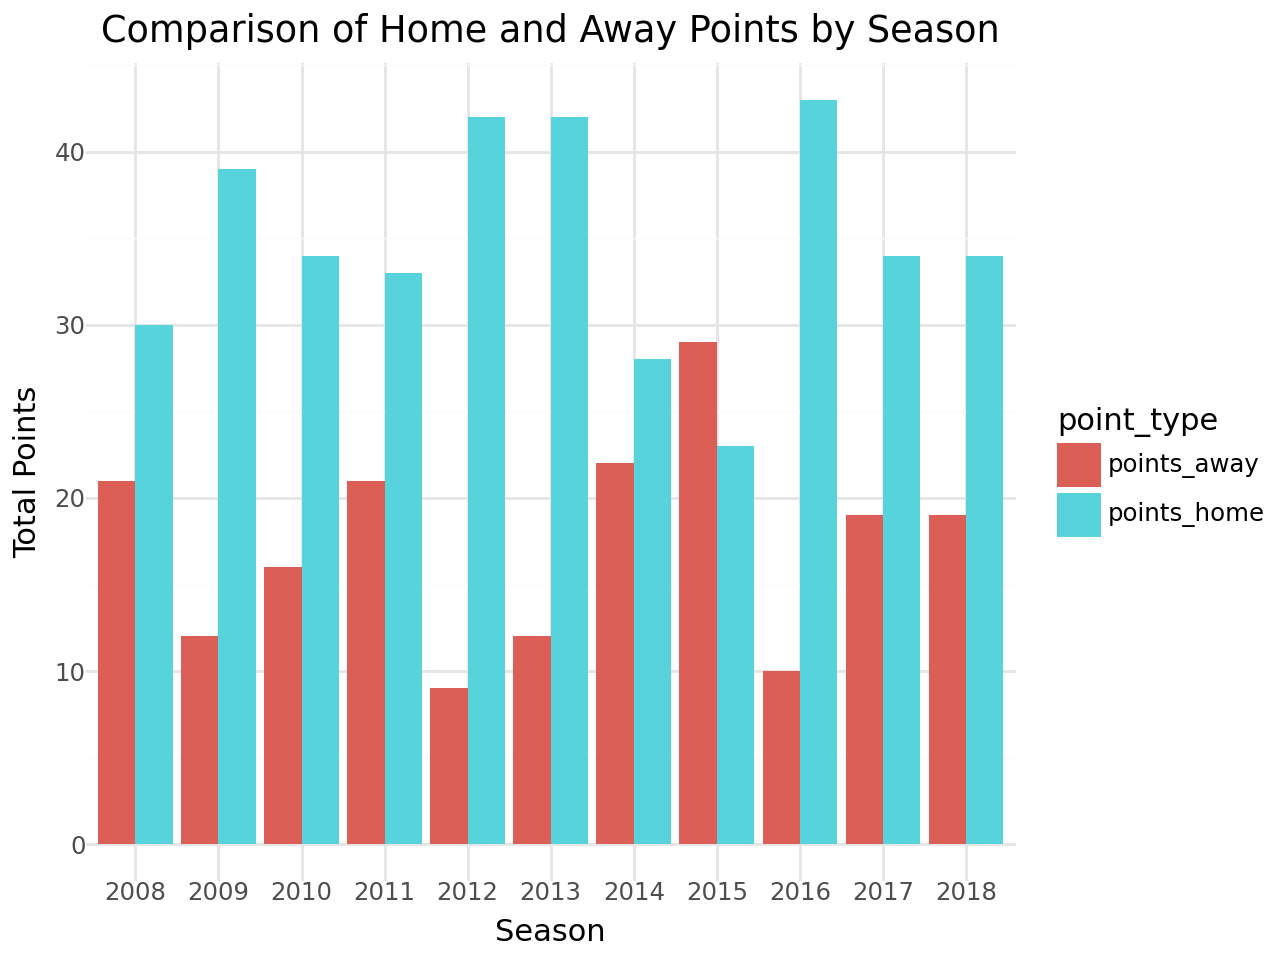

In [227]:
# Group by season and calculate the sum of points_home and points_away
summary = graph_data.groupby('season')[['points_home', 'points_away']].sum().reset_index()

# Melt the DataFrame for ggplot
summary_melted = summary.melt(id_vars='season', var_name='point_type', value_name='points')

# Create the bar plot
plot = (ggplot(summary_melted, aes(x='factor(season)', y='points', fill='point_type')) +
        geom_bar(stat='identity', position=position_dodge()) +
        labs(title='Comparison of Home and Away Points by Season',
             x='Season',
             y='Total Points') +
        theme_minimal())

# Display the plot
plot